In [35]:
# %%capture
import torch
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')

from NashRL import *
# from nashRL_netlib import *
from NashAgent_lib import *
from textwrap import wrap
from visualization import *
            
#Initialize a dummy agent
num_players = 5           # Total number of agents
T = 8                    # Total number of time steps

#Default simulation parameters
sim_dict = {'perm_price_impact': .3,
            'transaction_cost': .5,
            'liquidation_cost': .5,
            'running_penalty': 0,
            'T': T,
            'dt': 1,
            'N_agents': num_players,
            'drift_function': (lambda x, y: 0.1*(10-y)),
            'volatility': 1,
            'initial_price_var': 20}


sim_obj = MarketSimulator(sim_dict)
net_non_inv_dim = len(sim_obj.get_state()[0].to_numpy())
net_non_inv_dim -= sim_obj.N-1
out_dim = 4

nash_agent = NashNN(non_invar_dim=net_non_inv_dim,n_players=sim_obj.N,
                    output_dim=4, max_steps=T,
                    terminal_cost=0.5, num_moms=5)

#Load saved network parameters from file
# net_file_name = "Action_Net"
# net_file_name = "./pt_files/Action_Net_ADA_1502021.pt"
net_file_name = "./pt_files/Action_Net_ADA16032021.pt"

nash_agent.action_net.load_state_dict(torch.load(net_file_name))


<All keys matched successfully>

In [36]:
nash_agent.action_net.eval()
sim_obj.reset()
current_state, _, _ = sim_obj.get_state()
print(current_state)
print(nash_agent.predict_action([current_state])[0].mu)

State(t=8.0, p=10.655895, i=-0.34464286700247354, q=array([-3.72541925,  4.57510205,  6.54010567,  3.02568665,  3.39412574]))
tensor([-4.5665, -5.6534, -5.6638, -5.6358, -5.6442], grad_fn=<SelectBackward>)


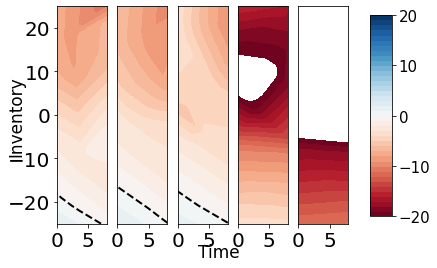

In [37]:
#Output Heatmap when other agent's average inventory is low
draw_heatmap(net=nash_agent,t_step=8*6,q_step=50,p_step=5,t_range=[0,8],
            q_range=[-25,25],p_range=[0,20],n_agents = num_players, other_agent_inv = 0,i_val=0)

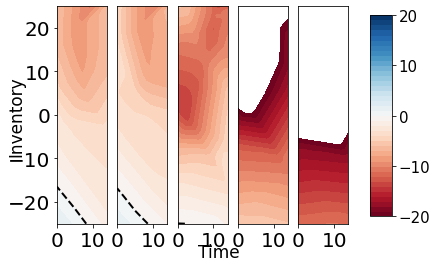

In [38]:
#Output Heatmap when other agent's average inventory is zero
draw_heatmap(net=nash_agent,t_step=15,q_step=50,p_step=5,t_range=[0,14],
            q_range=[-25,25],p_range=[5,20],n_agents = num_players, i_val=0, other_agent_inv = 0)

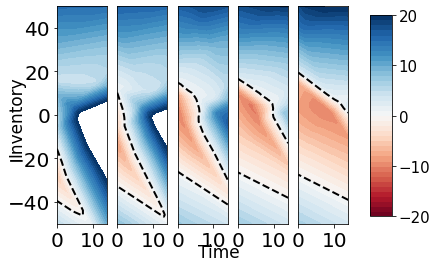

In [39]:
#Output Heatmap when other agent's average inventory is zero
draw_heatmap(net=nash_agent,t_step=15,q_step=50,p_step=5,t_range=[0,14],
            q_range=[-50,50],p_range=[5,20],n_agents = num_players, i_val = 0, other_agent_inv = 20)

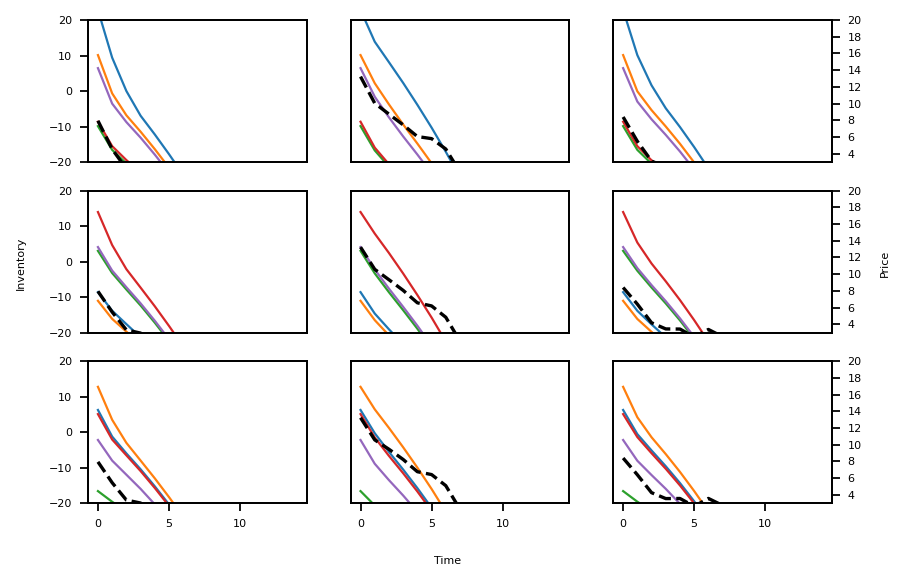

In [40]:
#Generates fixed paths (fixing starting inventory levels horizontally or fixing price paths vertically)
seed = 33333
np.random.seed(seed)

fixed_sample_paths(nash_agent,9,num_players,15, sim_dict, seed)

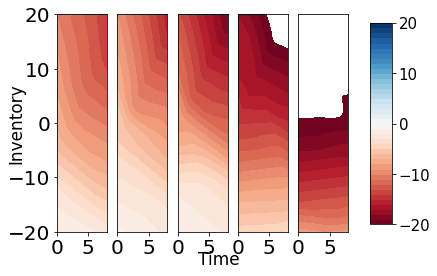

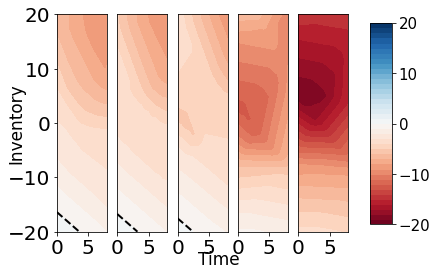

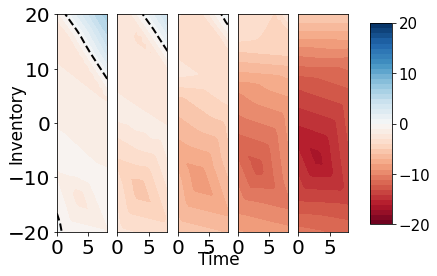

In [41]:
# Measure Change in Impact State

draw_heatmap(net=nash_agent,t_step=30,q_step=30,p_step=5,t_range=[8,0],
            q_range=[-20,20],p_range=[6,14],n_agents = num_players, other_agent_inv = 0,i_val=10)

draw_heatmap(net=nash_agent,t_step=30,q_step=30,p_step=5,t_range=[8,0],
            q_range=[-20,20],p_range=[6,14],n_agents = num_players, other_agent_inv = 0,i_val=0)

draw_heatmap(net=nash_agent,t_step=30,q_step=30,p_step=5,t_range=[8,0],
            q_range=[-20,20],p_range=[6,14],n_agents = num_players, other_agent_inv = 0,i_val=-10)
